# Practice 7: Neural Networks

Use this notebook as the starting point for the Practice activities.

Student Name:    **[  Put your Name Here ]**

**[Video Walkthough by Tom](https://www.youtube.com/watch?v=juginkyzZL0)**

# Section 0

=== *You must run this section to set up things for any of the sections below * ===
### Setting up Python tools



We'll use three libraries for this tutorial: 
- [pandas](http://pandas.pydata.org/) : dataframes for spreadsheet-like data analysis, reading CSV files, time series
- [numpy](http://www.numpy.org/) : for multidimensional data and linear algebra tools
- [matplotlib](http://matplotlib.org/) : Simple plotting and graphing
- [seaborn](http://stanford.edu/~mwaskom/software/seaborn/) : more advanced graphing
-  [scikit-learn](https://scikit-learn.org/stable/) : provides many machine learning algorithms and tools to training and test.




In [0]:
# First, we'll import pandas and numpy, two data processing libraries
import pandas as pd
import numpy as np

# We'll also import seaborn and matplot, twp Python graphing libraries
import seaborn as sns
import matplotlib.pyplot as plt
# Import the needed sklearn libraries
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.decomposition import PCA
from sklearn.preprocessing import LabelEncoder

# The Keras library provides support for neural networks and deep learning
print ("====== This should generate a FutureWaring on Conversion ===== ignore this warning")
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Lambda, Flatten, LSTM
from keras.layers import Conv2D, MaxPooling2D
from keras.optimizers import Adam, RMSprop
from keras.utils import np_utils

# We will turn off some warns in this notebook to make it easier to read for new students
import warnings
warnings.filterwarnings('ignore')

====== This should generate a FutureWaring on Conversion ===== ignore this warning


## The data sets
We will work with the following data sets:
- Section I: Iris flower dataset from Practice 2 & 4
- Section II: Breast cancer data from Project 1 & 2
- Section III: [MNIST](https://en.wikipedia.org/wiki/MNIST_database) handwritten digits. This is our first image data set. Each image is 16x16 grayscale pixels. 
<p>


# Section I: Iris Flowers 
=== *You must run Section 0 before this section* ===
## Neural Networks to Classify Iris Flowers

Remember the iris flower data set has four features for each flower. Each flower is in one of three species of Iris.

We will train a simple neural network to learn to classify the Iris flowers

First we will read in the Iris database...



In [0]:
# Read in the iris data file from stored in a raw file in GitHub
url_iris = 'https://raw.githubusercontent.com/CIS3115-Machine-Learning-Scholastica/CIS3115ML-Units3and4/master/Iris.csv'
iris = pd.read_csv(url_iris)
# Set the Id column as the index since it is unique for each flower
iris.set_index('Id', inplace=True)

species = iris['Species'].unique()


In [0]:
# Display the first 5 flowers to make sure the data was read in
iris.head(5)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
Id,,,,,
1,5.1,3.5,1.4,0.2,Iris-setosa
2,4.9,3.0,1.4,0.2,Iris-setosa
3,4.7,3.2,1.3,0.2,Iris-setosa
4,4.6,3.1,1.5,0.2,Iris-setosa
5,5.0,3.6,1.4,0.2,Iris-setosa


## Set up the input and output 
In the past we have called the input **"X"** and the output **"y"** but when working with multiple datasets we will use **"Xiris"** for the input features for the iris flower dataset. Likewise we will use **"yiris"** for the output categories for the iris flowers.


**Scale Data:** Neural Networks work best with the inputs are between -1 and +1, so the MinMaxScaler is used to scale all the inputs to the range 0 to +1.


**Split the Data:** The Iris data is split with 80% used for training and 20% used for testing.

**One-Hot Encoding:** Neural Networks like the output as one-hot encoding. This is a list of values, one for each category, which are all zeros except one which is 1 which represents the correct category.

So, if we have three iris species, we map each one to a one-hot encoding:
- Iris-setosa = [ 1, 0, 0 ]
- Iris-virginica  = [ 0, 1, 0 ]
- Iris-versicolor = [ 0, 0, 1 ]


In [0]:
input_Size = 4
output_Size = 3

feature_columns = ['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm','PetalWidthCm']
Xiris = iris[feature_columns].values
# We need the species labels converted to numbers for the neural network
yiris = LabelEncoder().fit_transform(iris["Species"])

# Scale the input data
mmScaler = MinMaxScaler()
Xiris = mmScaler.fit_transform(Xiris)

# Split the data into 80% for training and 20% for testing out the models
X_train, X_test, y_train, y_test = train_test_split(Xiris, yiris.ravel(), test_size=0.2)

# Format the output as one-hot encodings. Each output has three values with only one with a value of 1
y_train = np_utils.to_categorical(y_train, output_Size)
y_test = np_utils.to_categorical(y_test, output_Size)

In [0]:
print ("X_train training data is 120 flowers with 4 features each: " ,X_train.shape)
print ("X_test testing data is 30 flowers with 4 features each: " ,X_test.shape)

print ("y_train output is 1 of 3 species for 120 flowers: " ,y_train.shape)
print ("y_test output is 1 of 3 species for 30 flowers: : " ,y_test.shape)

X_train training data is 120 flowers with 4 features each:  (120, 4)
X_test testing data is 30 flowers with 4 features each:  (30, 4)
y_train output is 1 of 3 species for 120 flowers:  (120, 3)
y_test output is 1 of 3 species for 30 flowers: :  (30, 3)


## Neural Network

The following code sets up a sequential, four layer neural network. Sequential means that each layer is connected to the layer listed before it:
- Input layer: Input values are assigned to these units
- Hidden layer 1: 8 units using Rectified Linear Units (relu)
- Hidden layer 2: 6 units using Rectified Linear Units (relu)
- Output  layer: 3 units using softmax so sum of the three units will be 1.0

![neural network diagram](https://raw.githubusercontent.com/CIS3115-Machine-Learning-Scholastica/CIS3115ML-Units7and8/master/Iris%20Neural%20Network.png)




## Task 1: Understanding the Network Stucture

Answer the following questions about the network:

1. Why is the input size or dimension set to 4? Is this dependent on the data? Why is it 4 with the iris data?
2. Why is the the output size set to 3? How is dependent on the data used? How does this relate to the iris data?
3. This network uses "Dense" hidden layers where each node is connected to every node in the previous layer. Node 3 in Hidden layer 1 is highlight in the diagram. Which nodes from which layer does Node 3 recieve inputs from?
4. Node 3 in Hidden layer 1 is highlight in the diagram. Which nodes from which layer does Node 3 send its outputs to?

In [0]:
# Set up the Neural Network

input_Size = 4
output_Size = 3

Iris_neuralNetwork = Sequential()
Iris_neuralNetwork.add(Dense(20, activation='relu', input_dim=(input_Size)))
Iris_neuralNetwork.add(Dense(10, activation='relu'))
Iris_neuralNetwork.add(Dense(output_Size, activation='softmax'))


## Compile Neural Network

This builds the Neural network. You must specify 
- optimizer = 'adam' is a common gradient decent method for changing the wieghts during training
- loss =  'categorical_crossentropy' is used when you have a number of distinct categories and items can only be in one category.
- metrics = 'accuracy' will output the accuracy of the classification, the percent of time the network gets the classification correct

In [0]:
# Compile neural network model
Iris_neuralNetwork.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['accuracy'])

## Train the Neural Network

This will run all 120 training flowers through the network and update the weights. The 30 testing flowers are then used to validate the model. 

- epochs = 50 means to run the training 50 times. 
- Performance measues:
 - loss: is a measurement of how far the outputs are from the desired outputs. This should get smaller over time.
 - acc: is the prediction accuracy as a percent so 0.67 means the model predicts the correct flower 67% of the time. 
 - val_loss: the loss calculated using the testing flowers rather than the training flowers.
 - val_acc: the accuracy calculated using the testing flowers rather than the training flowers.
 
 
Note: sometimes training will take minutes, if not hours to run, especially later when we get to complex networks

In [0]:
# Fit model on training data for network with dense input layer
history = Iris_neuralNetwork.fit(X_train, y_train,
          epochs=200,
          verbose=1,
          validation_data=(X_test, y_test))


Train on 120 samples, validate on 30 samples
Epoch 1/200
120/120 [==============================] - 1s 6ms/step - loss: 1.0950 - acc: 0.3333 - val_loss: 1.0959 - val_acc: 0.3333
Epoch 2/200
120/120 [==============================] - 0s 91us/step - loss: 1.0890 - acc: 0.3333 - val_loss: 1.0910 - val_acc: 0.3333
Epoch 3/200
120/120 [==============================] - 0s 104us/step - loss: 1.0835 - acc: 0.3333 - val_loss: 1.0869 - val_acc: 0.3333
Epoch 4/200
120/120 [==============================] - 0s 74us/step - loss: 1.0789 - acc: 0.3333 - val_loss: 1.0833 - val_acc: 0.3333
Epoch 5/200
120/120 [==============================] - 0s 74us/step - loss: 1.0741 - acc: 0.3333 - val_loss: 1.0791 - val_acc: 0.3333
Epoch 6/200
120/120 [==============================] - 0s 72us/step - loss: 1.0692 - acc: 0.3333 - val_loss: 1.0744 - val_acc: 0.3333
Epoch 7/200
120/120 [==============================] - 0s 72us/step - loss: 1.0641 - acc: 0.3333 - val_loss: 1.0690 - val_acc: 0.3333
Epoch 8/200
120/1

In [0]:
# Evaluate model on test data
print ("Running final scoring on test data")
score = Iris_neuralNetwork.evaluate(X_test, y_test, verbose=1)
print ("The accuracy for this model is ", format(score[1], ",.2f"))

Running final scoring on test data
30/30 [==============================] - 0s 36us/step
The accuracy for this model is  0.97


## Plot the Training History

We store the performance during training is a variable named 'history'. The x-axis is the training time or number of epochs.

- Accuracy: Accuracy of the predictions, hopefully this is increasing to near 1.0
- Loss: How close the output is to the desired output, this should decrease to near 0.0

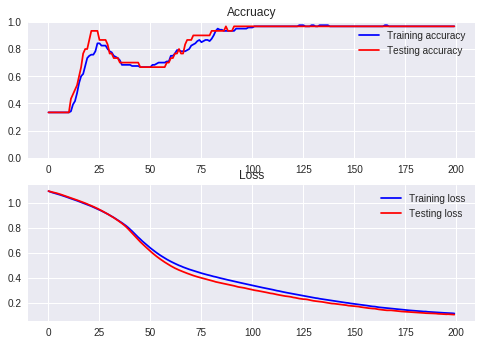

In [0]:
# Plot the loss and accuracy curves for training and validation 
fig, ax = plt.subplots(2,1)

ax[0].plot(history.history['acc'], color='b', label="Training accuracy")
ax[0].plot(history.history['val_acc'], color='r',label="Testing accuracy")
ax[0].set_title("Accruacy")
legend = ax[0].legend(loc='best', shadow=True)
ax[0].set_ylim([0, 1])
              
ax[1].plot(history.history['loss'], color='b', label="Training loss")
ax[1].plot(history.history['val_loss'], color='r', label="Testing loss",axes =ax[1])
ax[1].set_title("Loss")
legend = ax[1].legend(loc='best', shadow=True)



## Task 2: Improving the Network

1. What is the training accuracy, acc, and the testing accuracy, val_acc, of the model?

2. Change the number of epochs used during training from 50 to 200. 
 - Go back up to Task 1 and re-run all the cells down to this cell to re-train the network
 
3. Try more hidden layers. The more hidden layers, the  more internal features the nework can learn. Try changing the number of nodes in each hidden layer to larger numbers. How accurate can you get the network? 
 - Go back up to Task 1 and re-run all the cells down to this cell to re-train the network

## Task 3: Prediction
Once we have trained or fit the model to the data, we can use it to make predictions.

Here we will predict the iris species for a new flower with 
- SepalLengthCm = 5.2	
- SepalWidthCm = 3.3
- PetalLengthCm = 1.4
- PetalWidthCm	= 0.2

This should be a Iris-setosa

Change the code below to make a prediction for a new flower with the following measurements.
- SepalLengthCm = 4.2	
- SepalWidthCm = 3.0
- PetalLengthCm = 3.4
- PetalWidthCm	= 1.2

This should be a Iris-setosa

In [0]:
# The parameter order is SepalLengthCm, SepalWidthCm, PetalLengthCm, PetalWidthCm
flowerMeasurements = [ [5.2, 3.3, 1.4, 0.2] ]

# Scale the data since the original training data was scaled
flowerMeasurements = mmScaler.transform(flowerMeasurements).reshape(1, -1) 

# Use the neural network to generate the prediction
prediction = Iris_neuralNetwork.predict(flowerMeasurements)

# The prediction is a score for how likely each species is, the highest value corresponds to the predicted species
print ("Predicted score for each Iris species is ", prediction)
# [ 0.994  0.005  0.00002]

# select the indix with the maximum probability
irisNum = np.argmax(prediction)
print ("This flower is of type : ", species[irisNum])

Predicted score for each Iris species is  [[9.9437934e-01 5.6180633e-03 2.5489630e-06]]
This flower is of type :  Iris-setosa


# Section II: Breast Cancer Data
=== *You must run Section 0 before this section* ===
### Neural Networks with the cancer dataset
The following code loads in the breast cancer dataset

In [0]:
 
  # Read in the breast cancer data file from stored in a raw file in GitHub
url_bc = 'https://raw.githubusercontent.com/CIS3115-Machine-Learning-Scholastica/CIS3115ML-Units3and4/master/breast-cancer-wisconsin-data.csv'

cancer = pd.read_csv(url_bc)
# Set the Id column as the index since it is unique for each pati
cancer.set_index('id', inplace=True)

In [0]:
# Display the first 5 rows at the start, or head, of the dataframe
cancer.head(5)

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
id,,,,,,,,,,,,,,,,,,,,,
842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


### Set up the Input and output, X and y

Here we will use Xcancer and ycancer instead of X and y for the input features and output categories.

This data set has 569 tumors with 30 features on each tumor, along with each tumor's category as Benign or Malignant.

**Scale Data:** Neural Networks work best with the inputs are between -1 and +1, so the MinMaxScaler is used to scale all the inputs to the range 0 to +1.

**Split the Data:** The Iris data is split with 80% used for training and 20% used for testing.

**One-Hot Encoding:** Neural Networks like the output as one-hot encoding. This is a list of values, one for each category, which are all zeros except one which is 1 which represents the correct category.

So, if we have two outputs, benign or malignant, we map each one to a one-hot encoding:
- Benign = [ 0, 1 ]
- Malignant  = [ 1, 0 ]


In [0]:
input_Size = 30
output_Size = 2

# === Select all the data for input ===
Xcancer = cancer.iloc[:, 1:31] 
# The output is the diagnosis where M is Malignant and B is Benign
# We need the diagnosis labels converted to numbers for the neural network
ycancer = LabelEncoder().fit_transform(cancer["diagnosis"])

# Scale the input data
mmScaler = MinMaxScaler()
Xcancer = mmScaler.fit_transform(Xcancer)

# Split the data into 80% for training and 20% for testing out the models
X_train, X_test, y_train, y_test = train_test_split(Xcancer, ycancer.ravel(), test_size=0.2)

# Format the output as one-hot encodings. Each output has two values with only one with a value of 1
y_train = np_utils.to_categorical(y_train, output_Size)
y_test = np_utils.to_categorical(y_test, output_Size)

In [0]:
print ("X_train training data is 455 tumors with 30 features each: " ,X_train.shape)
print ("X_test testing data is 114 tumors with 30 features each: " ,X_test.shape)

print ("y_train output is 1 of 2 diagnosis for 455 tumors: " ,y_train.shape)
print ("y_test output is 1 of 2 diagnosis for 114 tumors: : " ,y_test.shape)

X_train training data is 455 tumors with 30 features each:  (455, 30)
X_test testing data is 114 tumors with 30 features each:  (114, 30)
y_train output is 1 of 2 diagnosis for 455 tumors:  (455, 2)
y_test output is 1 of 2 diagnosis for 114 tumors: :  (114, 2)


## Neural Network

The following code sets up a sequential, four layer neural network. Sequential means that each layer is connected to the layer listed before it:
- Input layer: 30 tumor features used as input values
- Hidden layer 1: 10 units using Rectified Linear Units (relu)
- Hidden layer 2: 5 units using Rectified Linear Units (relu)
- Output  layer: 2 units using softmax to predict if tumor is benign or malignant


### Neural Network








In [0]:
# Set up the Neural Network

input_Size = 30
output_Size = 2

Cancer_neuralNetwork = Sequential()
Cancer_neuralNetwork.add(Dense(10, activation='relu', input_dim=(input_Size)))
Cancer_neuralNetwork.add(Dense(5, activation='relu'))
Cancer_neuralNetwork.add(Dense(output_Size, activation='softmax'))


## Compile Neural Network

This builds the Neural network. You must specify 
- optimizer = 'adam' is a common gradient decent method for changing the wieghts during training
- loss =  'categorical_crossentropy' is used when you have a number of distinct categories and items can only be in one category.
- metrics = 'accuracy' will output the accuracy of the classification, the percent of time the network gets the classification correct

In [0]:
# Compile neural network model
Cancer_neuralNetwork.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

## Train the Neural Network

This will run all 120 training flowers through the network and update the weights. The 30 testing flowers are then used to validate the model. 

- epochs = 50 means to run the training 50 times. 
- Performance measues:
 - loss: is a measurement of how far the outputs are from the desired outputs. This should get smaller over time.
 - acc: is the prediction accuracy as a percent so 0.67 means the model predicts the correct flower 67% of the time. 
 - val_loss: the loss calculated using the testing flowers rather than the training flowers.
 - val_acc: the accuracy calculated using the testing flowers rather than the training flowers.
 
 
Note: sometimes training will take minutes, if not hours to run, especially later when we get to complex networks

In [0]:
# Fit model on training data for network with dense input layer
batch_size = 100
epochs = 50
history = Cancer_neuralNetwork.fit(X_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=2,
          validation_data=(X_test, y_test))


Train on 455 samples, validate on 114 samples
Epoch 1/50
 - 1s - loss: 0.6896 - acc: 0.3846 - val_loss: 0.6905 - val_acc: 0.3333
Epoch 2/50
 - 0s - loss: 0.6851 - acc: 0.4044 - val_loss: 0.6852 - val_acc: 0.4386
Epoch 3/50
 - 0s - loss: 0.6808 - acc: 0.5209 - val_loss: 0.6796 - val_acc: 0.6140
Epoch 4/50
 - 0s - loss: 0.6763 - acc: 0.7429 - val_loss: 0.6740 - val_acc: 0.8684
Epoch 5/50
 - 0s - loss: 0.6716 - acc: 0.8659 - val_loss: 0.6682 - val_acc: 0.8947
Epoch 6/50
 - 0s - loss: 0.6667 - acc: 0.9099 - val_loss: 0.6622 - val_acc: 0.8947
Epoch 7/50
 - 0s - loss: 0.6615 - acc: 0.9011 - val_loss: 0.6557 - val_acc: 0.8860
Epoch 8/50
 - 0s - loss: 0.6560 - acc: 0.9011 - val_loss: 0.6488 - val_acc: 0.9035
Epoch 9/50
 - 0s - loss: 0.6501 - acc: 0.8945 - val_loss: 0.6414 - val_acc: 0.9123
Epoch 10/50
 - 0s - loss: 0.6437 - acc: 0.8835 - val_loss: 0.6337 - val_acc: 0.9123
Epoch 11/50
 - 0s - loss: 0.6370 - acc: 0.8769 - val_loss: 0.6248 - val_acc: 0.9123
Epoch 12/50
 - 0s - loss: 0.6293 - acc:

## Task 4: Increasing the Accuracy of Cancer Predictions

In Project 2 you tried a number of different classification methods with the breast cancer data. Here are some typical results from Project 2:

- K-Nearest Neighbors (KNN): 95%
- Support Vector Machine (SVM): 97%
- Decision Trees (DT): 93%

Question 1: How accurate is the original network with hidden layers of 10 & 5 units trained for 50 epohs?

Question 2: How high of an accuracy can you get by adding more hidden units and training for more epochs? What configuration gave you the best results?

Question 3: Do neural networks seem comparable in this task with KNN, SVM and DT?

In [0]:
# Evaluate model on test data
print ("Running final scoring on test data")
score = Cancer_neuralNetwork.evaluate(X_test, y_test, verbose=1)
print ("The accuracy for this model is ", format(score[1], ",.2f"))

Running final scoring on test data
114/114 [==============================] - 0s 63us/step
The accuracy for this model is  0.91


## Plot the Training History

We store the performance during training is a variable named 'history'. The x-axis is the training time or number of epochs.

- Accuracy: Accuracy of the predictions, hopefully this is increasing to near 1.0
- Loss: How close the output is to the desired output, this should decrease to near 0.0

(0, 1)

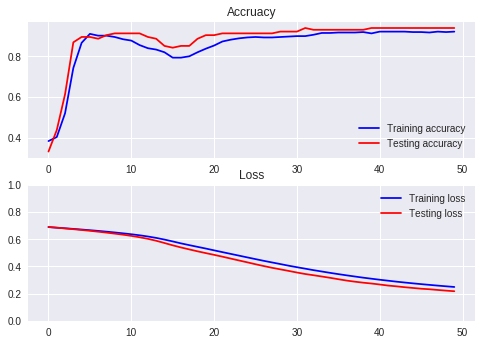

In [0]:
# Plot the loss and accuracy curves for training and validation 
fig, ax = plt.subplots(2,1)

ax[0].plot(history.history['acc'], color='b', label="Training accuracy")
ax[0].plot(history.history['val_acc'], color='r',label="Testing accuracy")
ax[0].set_title("Accruacy")
legend = ax[0].legend(loc='best', shadow=True)
              
ax[1].plot(history.history['loss'], color='b', label="Training loss")
ax[1].plot(history.history['val_loss'], color='r', label="Testing loss",axes =ax[1])
ax[1].set_title("Loss")
legend = ax[1].legend(loc='best', shadow=True)
plt.ylim(0,1)


# Section III:  Kaggle Digit Recognition Challenge
=== *You must run Section 0 before this section* ===
### MNIST hand written digits

The MNIST data set is a well known dataset built into the scikit learning library and available in many places.The images are 16x16 pixels so each image has 64 features. 

### Kaggle Challenges

Kaggle,  [www.Kaggle.com](https://www.kaggle.com/), is a website that host many machine learning compeitions, some for large prize money. 

We will particpate in their[ Digit Recognition Challenge](https://www.kaggle.com/c/digit-recognizer) which is very similar to the MNIST dataset. 



## Task 5: Register for Kaggle

Create an account at Kaggle,  [www.Kaggle.com](https://www.kaggle.com/). The easiest way to do this is to register with your CSS email address using the "Sign up with Google" option, but you are fee to register however you want.

### Part 1: Register at Kaggle

Once you have registered, post the URL for you account here--you can get there by selecting "My Account" under your icon at the top-right after you log in.

Student Account:  ____________________

### Part 2: Join the Digit Recognition Challenge

Once you have registered at Kaggle, you can joint the [Kaggle Digit Recognition challenge](https://www.kaggle.com/c/digit-recognizer). You need to do this to upload submissions which we will do in the next task

### Set up the Input and output

Kaggle provides special data for this challenge similar to the MNIST dataset. There is a labeled set of images for training and a unlabeled set of images for submission. Kaggle does not tell you what the sumission images are, but they will score your predictions if you submit them

- Training data: 42,000 images, each 28 x28 pixes, each labeled with the actual digit 0 - 9
- Submission data: 28,000 images, each 28 x 28 pixes, not labeled. You must generate predictions for each of these

**Downloading Kaggle Data: ** Your instructor has already downloaded the challenge data from Kaggle and uploaded it to Github were it is read in below.

**Formatting the data: **The data is converted into 28x28 pixel arrays so we can display it

### NOTE: This dataset is somewhat large and loading it may take a minute or two 


In [0]:
# Read data from the actual Kaggle download files stored in a raw file in GitHub
url_kaggle_train = 'https://raw.githubusercontent.com/CIS3115-Machine-Learning-Scholastica/CIS3115ML-Units7and8/master/kaggle-digit-recognizer/train.csv'
url_kaggle_test = 'https://raw.githubusercontent.com/CIS3115-Machine-Learning-Scholastica/CIS3115ML-Units7and8/master/kaggle-digit-recognizer/test.csv'
  
train_kaggle = pd.read_csv(url_kaggle_train)
# Pull out the labels or output which are saved in first index
y_train_kaggle = train_kaggle.iloc[:,0].values.astype('int32')
# Convert remaining values to floats
X_train_kaggle = (train_kaggle.iloc[:,1:].values).astype('float32')
# Read the kaggle test data which is used for submissions
X_submit_kaggle = (pd.read_csv(url_kaggle_test).values).astype('float32')
#reshape as 28x28 pixel images
X_train_kaggle = X_train_kaggle.reshape(X_train_kaggle.shape[0], 28, 28)
X_submit_kaggle = X_submit_kaggle.reshape(X_submit_kaggle.shape[0], 28, 28)

print ("X_train_kaggle training data shape of 28x28 pixels greyscale: " ,X_train_kaggle.shape)
print ("X_submit_kaggle submission data shape of 28x28 pixels greyscale: : " ,X_submit_kaggle.shape)

X_train_kaggle training data shape of 28x28 pixels greyscale:  (42000, 28, 28)
X_submit_kaggle submission data shape of 28x28 pixels greyscale: :  (28000, 28, 28)


In [0]:
train_kaggle.head(5)

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## Display some sample images

This is what a couple of the images look like. This also verifies that your data was read in correctly.

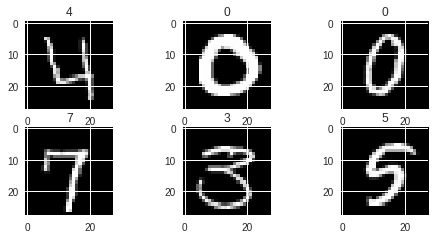

In [0]:
for i in range(3, 9):
    plt.subplot(330 + (i+1))
    plt.imshow(X_train_kaggle[i], cmap=plt.get_cmap('gray'))
    plt.title(y_train_kaggle[i]);

## Set up the data

**Scale Data:** Neural Networks work best with the inputs are between 0 and +1, but the grayscale images have pixel values between 0 and 255. So, each pixel value is divided by 255 to scale it.

**Reformatting: **Above we reformatted the data into 28x28 pixel arrays so we could display it. Now we are converting it back to a single list of 784 pixels. ( 28 x 28 = 784)

**Split the Data:** The training data is split with 90% used for training and 10% used for testing.

**One-Hot Encoding:** A one-hot encoding is a list which is 0 in most positions, and 1 in a single positions.  In this case, the nth digit will be represented as a vector which is 1 in the nth dimension.

- For example, 3 would be [0,0,0,1,0,0,0,0,0,0]

In [0]:

input_Size = 28 * 28    # images are 28 x 28 pixels or 784 pixels
output_Size = 10

# Normalize the data so values are between 0 and 1 instead of between 0 and 255
X_train_kaggle = X_train_kaggle / 255
X_submit_kaggle = X_submit_kaggle / 255

#reshape for dense-only inputs
train_size = X_train_kaggle.shape[0]
submit_size = X_submit_kaggle.shape[0]
X_train_kaggle = X_train_kaggle.reshape(train_size, 28 * 28)
X_submit_kaggle = X_submit_kaggle.reshape(submit_size, 28 * 28)

# Split the data into 80% for training and 10% for testing out the models
X_train, X_test, y_train_num, y_test_num = train_test_split(X_train_kaggle, y_train_kaggle, test_size=0.1)

# A one-hot encoding is a list which is 0 in most positions, and 1 in a single positions. 
# In this case, the nth digit will be represented as a vector which is 1 in the nth dimension.
# For example, 3 would be [0,0,0,1,0,0,0,0,0,0].
y_train = np_utils.to_categorical(y_train_num, output_Size)
y_test = np_utils.to_categorical(y_test_num, output_Size)


In [0]:
print ("X_train training data shape of 28x28 pixels greyscale: " ,X_train.shape)
print ("X_test submission data shape of 28x28 pixels greyscale: : " ,X_test.shape)

print ("y_train training data shape of 28x28 pixels greyscale: " ,y_train.shape)
print ("y_test submission data shape of 28x28 pixels greyscale: : " ,y_test.shape)

X_train training data shape of 28x28 pixels greyscale:  (37800, 784)
X_test submission data shape of 28x28 pixels greyscale: :  (4200, 784)
y_train training data shape of 28x28 pixels greyscale:  (37800, 10)
y_test submission data shape of 28x28 pixels greyscale: :  (4200, 10)


## Neural Network

The following code sets up a sequential, four layer neural network. Sequential means that each layer is connected to the layer listed before it:
- Input layer: 784 pixels (28x28) used as input values
- Hidden layer 1: 20 units using Rectified Linear Units (relu)
- Hidden layer 2: 10 units using Rectified Linear Units (relu)
- Output  layer: 10 units using softmax to predict the correct digit between 0 and 9
---


In [0]:
# Set up the Neural Network
input_Size = 28 * 28    # images are 28 x 28 pixels or 784 pixels
output_Size = 10

Digit_neuralNetwork = Sequential()
Digit_neuralNetwork.add(Dense(20, activation='relu', input_dim=(input_Size)))
Digit_neuralNetwork.add(Dense(10, activation='relu'))
Digit_neuralNetwork.add(Dense(output_Size, activation='softmax'))


## Compile Neural Network

This builds the Neural network. You must specify 
- optimizer = 'adam' is a common gradient decent method for changing the wieghts during training
- loss =  'categorical_crossentropy' is used when you have a number of distinct categories and items can only be in one category.
- metrics = 'accuracy' will output the accuracy of the classification, the percent of time the network gets the classification correct

In [0]:
# Compile neural network model
Digit_neuralNetwork.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

## Train the Neural Network

This will run all 37800 training images through the network and update the weights. 

- epochs = 10 means to run the training 10 times. 
- Performance measues:
 - loss: is a measurement of how far the outputs are from the desired outputs. This should get smaller over time.
 - acc: is the prediction accuracy as a percent so 0.67 means the model predicts the correct flower 67% of the time. 
 - val_loss: the loss calculated using the testing flowers rather than the training flowers.
 - val_acc: the accuracy calculated using the testing flowers rather than the training flowers.
 
 
### Note: This is a large data set and training will be slow. This might take a couple of minutes to run. 

This is why we are only using 10 epochs initially

In [0]:
# Fit model on training data for network with dense input layer

history = Digit_neuralNetwork.fit(X_train, y_train,
          epochs=10,
          verbose=1,
          validation_data=(X_test, y_test))


Train on 37800 samples, validate on 4200 samples
Epoch 1/10
37800/37800 [==============================] - 3s 83us/step - loss: 0.5653 - acc: 0.8341 - val_loss: 0.2907 - val_acc: 0.9171
Epoch 2/10
37800/37800 [==============================] - 2s 57us/step - loss: 0.2527 - acc: 0.9263 - val_loss: 0.2217 - val_acc: 0.9360
Epoch 3/10
37800/37800 [==============================] - 2s 58us/step - loss: 0.2048 - acc: 0.9417 - val_loss: 0.1983 - val_acc: 0.9448
Epoch 4/10
37800/37800 [==============================] - 2s 57us/step - loss: 0.1806 - acc: 0.9477 - val_loss: 0.1953 - val_acc: 0.9450
Epoch 5/10
37800/37800 [==============================] - 2s 57us/step - loss: 0.1637 - acc: 0.9531 - val_loss: 0.1760 - val_acc: 0.9512
Epoch 6/10
37800/37800 [==============================] - 2s 58us/step - loss: 0.1513 - acc: 0.9556 - val_loss: 0.1657 - val_acc: 0.9531
Epoch 7/10
37800/37800 [==============================] - 2s 58us/step - loss: 0.1415 - acc: 0.9589 - val_loss: 0.1591 - val_acc:

In [0]:
# 10. Evaluate model on test data
print ("Running final scoring on test data")
score = Digit_neuralNetwork.evaluate(X_test, y_test, verbose=1)
print ("The accuracy for this model is ", format(score[1], ",.2f"))

Running final scoring on test data
4200/4200 [==============================] - 0s 34us/step
The accuracy for this model is  0.95


## Plot the Training History

We store the performance during training is a variable named 'history'. The x-axis is the training time or number of epochs.

- Accuracy: Accuracy of the predictions, hopefully this is increasing to near 1.0
- Loss: How close the output is to the desired output, this should decrease to near 0.0

(0, 1)

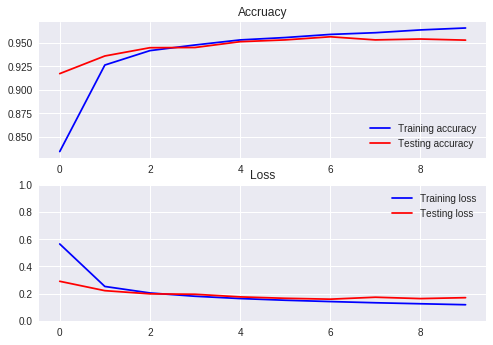

In [0]:
# Plot the loss and accuracy curves for training and validation 
fig, ax = plt.subplots(2,1)

ax[0].plot(history.history['acc'], color='b', label="Training accuracy")
ax[0].plot(history.history['val_acc'], color='r',label="Testing accuracy")
ax[0].set_title("Accruacy")
legend = ax[0].legend(loc='best', shadow=True)
              
ax[1].plot(history.history['loss'], color='b', label="Training loss")
ax[1].plot(history.history['val_loss'], color='r', label="Testing loss",axes =ax[1])
ax[1].set_title("Loss")
legend = ax[1].legend(loc='best', shadow=True)
plt.ylim(0,1)

## Create the Submission for Kaggle

The following code generates a file named CIS3115_Submission.csv which you need to download to your local PC and then upload to [Kaggle's Digit Recognition competition](https://www.kaggle.com/c/digit-recognizer/submit).


In [0]:
predictions = Digit_neuralNetwork.predict_classes(X_submit_kaggle, verbose=0)

submissions=pd.DataFrame({"ImageId": list(range(1,len(predictions)+1)), "Label": predictions})

submissions.to_csv("CIS3115_Submission.csv", index=False, header=True)

## Task 6: First Kaggle Submission

Run the code above after training the network above. It will go through the 28,000 submission images and generate an prediction for each. These are saved in a file named "CIS3115_Submission.csv"

**Colab Users: ** The submission file is stored in the Colab files tied to this colab notebook in the Google cloud. 
1. Open the left-side menu by clicking on the > icon near the top-left
2. Select the file tab
3. Hit the Refresh button and the file should be displayed in the list
4. Right-click on the file and choose "Download" and save it to a folder on your PC.

**Juptyter Notebook Users: ** The submission file will be stored in the same folder as your Jupyter notebook file.

Once you have the file, return to  the [Kaggle Digit Recognition challenge](https://www.kaggle.com/c/digit-recognizer) and select the Submit button. Follow the steps to upload your submission and see how it scores.

Record your initial submission score here: _ _ _ _ _ _ _ _ _ _ _ _


## Task 7: Improve you Score

Try making changes to your neural network above. Consider more hidden units and more epochs. Try to improve both your training and testing (validation) accuracy.

Upload at least one more attemp to  the [Kaggle Digit Recognition challenge](https://www.kaggle.com/c/digit-recognizer).

Record your submission scores here:  _ _ _ _ _ _ _ _ _ _


### Note: Next week we will study a number of methods to improve your score, so don't be dissapointed if your score this week is low.

# Wrapping Up

Remember to **share this sheet with your instructo**r and submit a link to it in Blackboard.